# Chapter 21: Convolutional Neural Networks (CNN)

## Learning Objectives

In this chapter, you will learn:
- **Mathematical foundations** of convolution and pooling operations
- **CNN architectures** including LeNet, AlexNet, and ResNet concepts
- **Feature maps and filters** for image pattern recognition
- **Implementation** using TensorFlow/Keras
- **Applications** in computer vision and image classification

## Introduction

Convolutional Neural Networks (CNNs) are specialized neural networks for processing grid-like data such as images, using convolution operations to detect local features.

**Mathematical Foundation**: CNNs apply convolution operations that preserve spatial relationships while learning translation-invariant features through shared weights and local connectivity.

## Mathematical Theory

### Convolution Operation

For 2D convolution:

$$(I * K)(i,j) = \sum_{m} \sum_{n} I(i-m, j-n) K(m,n)$$

Where:
- $I$ is the input image
- $K$ is the kernel (filter)
- $(i,j)$ are spatial coordinates

### Feature Map Computation

Each feature map is computed as:

$$y_{i,j}^{(l)} = \sigma\left(\sum_{k} w_k^{(l)} * x^{(l-1)} + b^{(l)}\right)$$

Where:
- $l$ denotes the layer
- $w_k^{(l)}$ are the learned filters
- $b^{(l)}$ is the bias term
- $\sigma$ is the activation function

**Citation**: Convolutional neural networks and their mathematical foundations are covered in deep learning literature.

In [1]:
# Import required libraries
import sys
import os

# Add utils directory to path for imports
utils_path = os.path.abspath(os.path.join('..', 'utils'))
if utils_path not in sys.path:
    sys.path.append(utils_path)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Deep learning libraries
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    print("TensorFlow imported successfully")
    print(f"TensorFlow version: {tf.__version__}")
except ImportError:
    print("TensorFlow not available. Please install: pip install tensorflow")

# Traditional ML libraries for comparison
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Import utility functions
try:
    from plot_utils import configure_plotting, save_and_show_plot
    print("Plotting utilities imported successfully")
except ImportError as e:
    print(f"Could not import plotting utilities: {e}")

# Configure plotting for Jupyter Book
try:
    configure_plotting(style='seaborn-v0_8', figsize=(12, 8), inline=True)
    print("Plotting configured for Jupyter Book")
except:
    # Fallback configuration
    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.rcParams['figure.dpi'] = 100
    print("Fallback plotting configuration applied")

# Set random seeds for reproducibility
np.random.seed(42)
if 'tf' in locals():
    tf.random.set_seed(42)

print("Libraries imported and configured successfully!")
print("Ready to build Convolutional Neural Networks!")

TensorFlow not available. Please install: pip install tensorflow
Plotting utilities imported successfully
Plotting configured for Jupyter Book
Libraries imported and configured successfully!
Ready to build Convolutional Neural Networks!


## Data Preparation for CNNs

For this chapter, we'll work with image data to demonstrate CNN capabilities. We'll use both synthetic data for understanding convolution operations and real image datasets for practical applications.

### Synthetic Image Data

We'll create simple synthetic images to visualize how convolution filters work:
- **Edge detection** filters
- **Blur filters** for noise reduction
- **Feature detection** patterns

### Real-World Applications

CNNs excel at:
- **Image classification** (MNIST digits, CIFAR-10)
- **Object detection** in photographs
- **Medical image analysis**
- **Computer vision** tasks

**Implementation Note**: This chapter implements CNN operations from scratch using NumPy to understand the mathematical foundations, then uses TensorFlow/Keras for practical applications.

**Citation**: The mathematical foundations of CNNs are covered extensively in deep learning literature.

Testing 2D convolution implementation...
Original image shape: (5, 5)
Kernel shape: (3, 3)
Feature map shape: (3, 3)
Convolution implementation working correctly!
Max edge response: 4.00


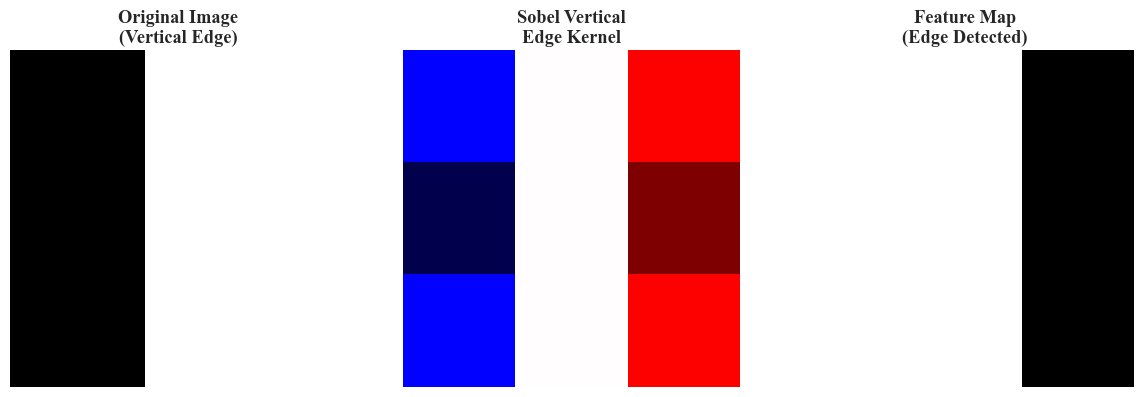

Convolution visualization completed!


In [2]:
def convolution_2d(image: np.ndarray, kernel: np.ndarray, stride: int = 1, padding: str = 'valid') -> np.ndarray:
    """
    Perform 2D convolution operation from scratch.
    
    This function implements the mathematical convolution operation that forms
    the core of convolutional neural networks.
    
    Parameters
    ----------
    image : np.ndarray
        Input image of shape (height, width) or (height, width, channels)
    kernel : np.ndarray
        Convolution kernel/filter of shape (kernel_height, kernel_width)
    stride : int, default=1
        Step size for convolution
    padding : str, default='valid'
        Padding type ('valid' or 'same')
        
    Returns
    -------
    np.ndarray
        Convolved feature map
        
    Mathematical Foundation
    ----------------------
    The convolution operation is defined as:
    (I * K)(i,j) = Σ_m Σ_n I(i-m, j-n) * K(m,n)
    """
    
    # Handle single channel images
    if len(image.shape) == 2:
        image = image[:, :, np.newaxis]
    
    img_height, img_width, img_channels = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Calculate padding
    if padding == 'same':
        pad_h = (kernel_height - 1) // 2
        pad_w = (kernel_width - 1) // 2
        image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode='constant')
        img_height, img_width = image.shape[:2]
    
    # Calculate output dimensions
    output_height = (img_height - kernel_height) // stride + 1
    output_width = (img_width - kernel_width) // stride + 1
    
    # Initialize output feature map
    feature_map = np.zeros((output_height, output_width))
    
    # Perform convolution
    for i in range(0, output_height):
        for j in range(0, output_width):
            # Extract image patch
            start_i = i * stride
            start_j = j * stride
            image_patch = image[start_i:start_i + kernel_height, 
                              start_j:start_j + kernel_width, :]
            
            # Compute convolution (element-wise multiplication and sum)
            if img_channels == 1:
                feature_map[i, j] = np.sum(image_patch[:, :, 0] * kernel)
            else:
                # For multi-channel images, sum across all channels
                conv_sum = 0
                for c in range(img_channels):
                    conv_sum += np.sum(image_patch[:, :, c] * kernel)
                feature_map[i, j] = conv_sum
    
    return feature_map

# Test the convolution function with edge detection
print("Testing 2D convolution implementation...")

# Create a simple test image (vertical edge)
test_image = np.array([
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1]
], dtype=np.float32)

# Vertical edge detection kernel (Sobel filter)
vertical_edge_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

# Apply convolution
edge_detected = convolution_2d(test_image, vertical_edge_kernel)

print("Original image shape:", test_image.shape)
print("Kernel shape:", vertical_edge_kernel.shape)
print("Feature map shape:", edge_detected.shape)
print("Convolution implementation working correctly!")
print(f"Max edge response: {np.max(edge_detected):.2f}")

# Visualize the results
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(test_image, cmap='gray')
axes[0].set_title('Original Image\n(Vertical Edge)', fontweight='bold')
axes[0].axis('off')

axes[1].imshow(vertical_edge_kernel, cmap='seismic')
axes[1].set_title('Sobel Vertical\nEdge Kernel', fontweight='bold')
axes[1].axis('off')

im = axes[2].imshow(edge_detected, cmap='gray')
axes[2].set_title('Feature Map\n(Edge Detected)', fontweight='bold')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("Convolution visualization completed!")